__Importing required libraries__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
%matplotlib inline

# Data Cleaning

__Reading the loan dataset__

In [2]:
loan=pd.read_csv('loan.csv', encoding='ISO-8859-1')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


__Removing columns which have 100% null values__

In [3]:
l=loan.iloc[:,list(loan.isna().sum()/len(loan)!=1)]
l.columns
# l.isna().sum()/len(l)
# l.to_csv('loan_mod.csv')

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

__Percentage of null values in each column__

In [4]:
round(100*(l.isnull().sum()/len(l.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
                              ... 
revol_bal                     0.00
revol_util                    0.13
total_acc           

__Removing null values where either percentage is very high or the column is not relevant for analysis.We did remove some columns where all the rows contain same value.__<br><br>1. Textual fields like desc, member_id, id, and url are not needed for analysis because desc and url are long textual description, member_id and id are unique values.<br>2. 'last_pymnt_d' column not required as it just shows the date for last payment amount, there are 3 rows where last payment amount is 0 but date is present and the loan status is fully paid. So we can ignore this column.<br>3. next_pymnt_d is next date of payment, last_credit_pull_d is date when the loan status was put and similarly others columns mentioned below can be ignored. 

In [5]:
cols_having_only_one_unique_value = "pymnt_plan,initial_list_status,policy_code,application_type,acc_now_delinq,delinq_amnt,tax_liens,chargeoff_within_12_mths,collections_12_mths_ex_med" 
cols_having_text = "desc,member_id,id,url"
other_cols="mths_since_last_record,mths_since_last_delinq,next_pymnt_d,last_pymnt_d,last_credit_pull_d"
col_to_remove=cols_having_only_one_unique_value+','+cols_having_text+','+other_cols
cols=list(set(l.columns)-set(col_to_remove.split(",")))
l=l.loc[:,cols]
print(len(l.columns))
l.head()


39


,funded_amnt,revol_util,recoveries,grade,total_rec_late_fee,term,purpose,total_rec_int,open_acc,out_prncp_inv,revol_bal,installment,funded_amnt_inv,verification_status,inq_last_6mths,total_acc,loan_status,home_ownership,total_rec_prncp,zip_code,dti,title,total_pymnt_inv,addr_state,loan_amnt,collection_recovery_fee,total_pymnt,last_pymnt_amnt,sub_grade,earliest_cr_line,delinq_2yrs,out_prncp,pub_rec_bankruptcies,int_rate,issue_d,emp_title,annual_inc,emp_length,pub_rec
0,5000,83.70%,0.00,B,0.00,36 months,credit_card,863.16,3,0.00,13648,162.87,4975.00,Verified,1,9,Fully Paid,RENT,5000.00,860xx,27.65,Computer,5833.84,AZ,5000,0.00,5863.16,171.62,B2,Jan-85,0,0.00,0.00,10.65%,Dec-11,NaN,24000.00,10+ years,0
1,2500,9.40%,117.08,C,0.00,60 months,car,435.17,3,0.00,1687,59.83,2500.00,Source Verified,5,4,Charged Off,RENT,456.46,309xx,1.00,bike,1008.71,GA,2500,1.11,1008.71,119.66,C4,Apr-99,0,0.00,0.00,15.27%,Dec-11,Ryder,30000.00,< 1 year,0
2,2400,98.50%,0.00,C,0.00,36 months,small_business,605.67,2,0.00,2956,84.33,2400.00,Not Verified,2,10,Fully Paid,RENT,2400.00,606xx,8.72,real estate business,3005.67,IL,2400,0.00,3005.67,649.91,C5,Nov-01,0,0.00,0.00,15.96%,Dec-11,NaN,12252.00,10+ years,0
3,10000,21%,0.00,C,16.97,36 months,other,2214.92,10,0.00,5598,339.31,10000.00,Source Verified,1,37,Fully Paid,RENT,10000.00,917xx,20.00,personel,12231.89,CA,10000,0.00,12231.89,357.48,C1,Feb-96,0,0.00,0.00,13.49%,Dec-11,AIR RESOURCES BOARD,49200.00,10+ years,0
4,3000,53.90%,0.00,B,0.00,60 months,other,1037.39,15,524.06,27783,67.79,3000.00,Source Verified,0,38,Current,RENT,2475.94,972xx,17.94,Personal,3513.33,OR,3000,0.00,3513.33,67.79,B5,Jan-96,0,524.06,0.00,12.69%,Dec-11,University Medical Group,80000.00,1 year,0


*Removing more columns by analysing the dataframe*

In [6]:
print('unique in title', l['title'].nunique())
print('unique in zip_code', l['zip_code'].nunique())
print('unique in emp_title' , l['emp_title'].nunique())
print()
print('null in title', l['title'].isna().sum()/len(l))
print('null in zip_code', l['zip_code'].isna().sum()/len(l))
print('null in emp_title' , l['emp_title'].isna().sum()/len(l))

# As checked above there are so many unique values so we will ignore them
# column grade is redundant as we have sub grades

l.drop(columns=['title', 'zip_code', 'emp_title'], inplace=True)
print('no of columns remaining:',len(l.columns))
l.head()

unique in title 19615
unique in zip_code 823
unique in emp_title 28820

null in title 0.00027695948838029054
null in zip_code 0.0
null in emp_title 0.06191303472064859
no of columns remaining: 36


,funded_amnt,revol_util,recoveries,grade,total_rec_late_fee,term,purpose,total_rec_int,open_acc,out_prncp_inv,revol_bal,installment,funded_amnt_inv,verification_status,inq_last_6mths,total_acc,loan_status,home_ownership,total_rec_prncp,dti,total_pymnt_inv,addr_state,loan_amnt,collection_recovery_fee,total_pymnt,last_pymnt_amnt,sub_grade,earliest_cr_line,delinq_2yrs,out_prncp,pub_rec_bankruptcies,int_rate,issue_d,annual_inc,emp_length,pub_rec
0,5000,83.70%,0.00,B,0.00,36 months,credit_card,863.16,3,0.00,13648,162.87,4975.00,Verified,1,9,Fully Paid,RENT,5000.00,27.65,5833.84,AZ,5000,0.00,5863.16,171.62,B2,Jan-85,0,0.00,0.00,10.65%,Dec-11,24000.00,10+ years,0
1,2500,9.40%,117.08,C,0.00,60 months,car,435.17,3,0.00,1687,59.83,2500.00,Source Verified,5,4,Charged Off,RENT,456.46,1.00,1008.71,GA,2500,1.11,1008.71,119.66,C4,Apr-99,0,0.00,0.00,15.27%,Dec-11,30000.00,< 1 year,0
2,2400,98.50%,0.00,C,0.00,36 months,small_business,605.67,2,0.00,2956,84.33,2400.00,Not Verified,2,10,Fully Paid,RENT,2400.00,8.72,3005.67,IL,2400,0.00,3005.67,649.91,C5,Nov-01,0,0.00,0.00,15.96%,Dec-11,12252.00,10+ years,0
3,10000,21%,0.00,C,16.97,36 months,other,2214.92,10,0.00,5598,339.31,10000.00,Source Verified,1,37,Fully Paid,RENT,10000.00,20.00,12231.89,CA,10000,0.00,12231.89,357.48,C1,Feb-96,0,0.00,0.00,13.49%,Dec-11,49200.00,10+ years,0
4,3000,53.90%,0.00,B,0.00,60 months,other,1037.39,15,524.06,27783,67.79,3000.00,Source Verified,0,38,Current,RENT,2475.94,17.94,3513.33,OR,3000,0.00,3513.33,67.79,B5,Jan-96,0,524.06,0.00,12.69%,Dec-11,80000.00,1 year,0


__Modifying columns like int_rate, emp_length, issue_d, earliest_cr_line, etc to convert them into proper dtypes__

In [7]:
# removing % from percent values and convert to float
l.int_rate=l.int_rate.str.replace('%','').astype('float')
l.revol_util=l.revol_util.str.replace('%','').astype('float')

# making employee length column more readable
l.emp_length=l.emp_length.apply(lambda x: '10 years' if x=='10+ years' else ('0 year' if x=='< 1 year' else x))

# converting dates to datetime format
l.issue_d='2020-'+l.issue_d
l.issue_d=pd.to_datetime(l.issue_d)
l.earliest_cr_line=pd.to_datetime(l.earliest_cr_line,format='%b-%y')

l.head()


,funded_amnt,revol_util,recoveries,grade,total_rec_late_fee,term,purpose,total_rec_int,open_acc,out_prncp_inv,revol_bal,installment,funded_amnt_inv,verification_status,inq_last_6mths,total_acc,loan_status,home_ownership,total_rec_prncp,dti,total_pymnt_inv,addr_state,loan_amnt,collection_recovery_fee,total_pymnt,last_pymnt_amnt,sub_grade,earliest_cr_line,delinq_2yrs,out_prncp,pub_rec_bankruptcies,int_rate,issue_d,annual_inc,emp_length,pub_rec
0,5000,83.70,0.00,B,0.00,36 months,credit_card,863.16,3,0.00,13648,162.87,4975.00,Verified,1,9,Fully Paid,RENT,5000.00,27.65,5833.84,AZ,5000,0.00,5863.16,171.62,B2,1985-01-01,0,0.00,0.00,10.65,2020-12-11,24000.00,10 years,0
1,2500,9.40,117.08,C,0.00,60 months,car,435.17,3,0.00,1687,59.83,2500.00,Source Verified,5,4,Charged Off,RENT,456.46,1.00,1008.71,GA,2500,1.11,1008.71,119.66,C4,1999-04-01,0,0.00,0.00,15.27,2020-12-11,30000.00,0 year,0
2,2400,98.50,0.00,C,0.00,36 months,small_business,605.67,2,0.00,2956,84.33,2400.00,Not Verified,2,10,Fully Paid,RENT,2400.00,8.72,3005.67,IL,2400,0.00,3005.67,649.91,C5,2001-11-01,0,0.00,0.00,15.96,2020-12-11,12252.00,10 years,0
3,10000,21.00,0.00,C,16.97,36 months,other,2214.92,10,0.00,5598,339.31,10000.00,Source Verified,1,37,Fully Paid,RENT,10000.00,20.00,12231.89,CA,10000,0.00,12231.89,357.48,C1,1996-02-01,0,0.00,0.00,13.49,2020-12-11,49200.00,10 years,0
4,3000,53.90,0.00,B,0.00,60 months,other,1037.39,15,524.06,27783,67.79,3000.00,Source Verified,0,38,Current,RENT,2475.94,17.94,3513.33,OR,3000,0.00,3513.33,67.79,B5,1996-01-01,0,524.06,0.00,12.69,2020-12-11,80000.00,1 year,0


*As checked in excel, the below mentioned columns contain discrete values. So using them as a categorical variable will be more usefull*

In [8]:
l.pub_rec_bankruptcies=l.pub_rec_bankruptcies.astype('object')
l.delinq_2yrs=l.delinq_2yrs.astype('object')
l.inq_last_6mths = l.inq_last_6mths.astype('object')
l.pub_rec = l.pub_rec.astype('object')                                           
l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
funded_amnt                39717 non-null int64
revol_util                 39667 non-null float64
recoveries                 39717 non-null float64
grade                      39717 non-null object
total_rec_late_fee         39717 non-null float64
term                       39717 non-null object
purpose                    39717 non-null object
total_rec_int              39717 non-null float64
open_acc                   39717 non-null int64
out_prncp_inv              39717 non-null float64
revol_bal                  39717 non-null int64
installment                39717 non-null float64
funded_amnt_inv            39717 non-null float64
verification_status        39717 non-null object
inq_last_6mths             39717 non-null object
total_acc                  39717 non-null int64
loan_status                39717 non-null object
home_ownership             39717 non-null object
total_

__Filtering the rows__<br>Taking loan status where value is Charged Off and Fully Paid. Since the loan status 'Current' is still in progress so we will skip them as its value keep in changing and will not help in analysis. After our analysis, we can apply our observation to these rows check whether the customer will be a defaulter or not.

In [9]:
loan_status_current_rows = l[l.loan_status=='Current']
l=l[l.loan_status!='Current']
l.head()

,funded_amnt,revol_util,recoveries,grade,total_rec_late_fee,term,purpose,total_rec_int,open_acc,out_prncp_inv,revol_bal,installment,funded_amnt_inv,verification_status,inq_last_6mths,total_acc,loan_status,home_ownership,total_rec_prncp,dti,total_pymnt_inv,addr_state,loan_amnt,collection_recovery_fee,total_pymnt,last_pymnt_amnt,sub_grade,earliest_cr_line,delinq_2yrs,out_prncp,pub_rec_bankruptcies,int_rate,issue_d,annual_inc,emp_length,pub_rec
0,5000,83.70,0.00,B,0.00,36 months,credit_card,863.16,3,0.00,13648,162.87,4975.00,Verified,1,9,Fully Paid,RENT,5000.00,27.65,5833.84,AZ,5000,0.00,5863.16,171.62,B2,1985-01-01,0,0.00,0.00,10.65,2020-12-11,24000.00,10 years,0
1,2500,9.40,117.08,C,0.00,60 months,car,435.17,3,0.00,1687,59.83,2500.00,Source Verified,5,4,Charged Off,RENT,456.46,1.00,1008.71,GA,2500,1.11,1008.71,119.66,C4,1999-04-01,0,0.00,0.00,15.27,2020-12-11,30000.00,0 year,0
2,2400,98.50,0.00,C,0.00,36 months,small_business,605.67,2,0.00,2956,84.33,2400.00,Not Verified,2,10,Fully Paid,RENT,2400.00,8.72,3005.67,IL,2400,0.00,3005.67,649.91,C5,2001-11-01,0,0.00,0.00,15.96,2020-12-11,12252.00,10 years,0
3,10000,21.00,0.00,C,16.97,36 months,other,2214.92,10,0.00,5598,339.31,10000.00,Source Verified,1,37,Fully Paid,RENT,10000.00,20.00,12231.89,CA,10000,0.00,12231.89,357.48,C1,1996-02-01,0,0.00,0.00,13.49,2020-12-11,49200.00,10 years,0
5,5000,28.30,0.00,A,0.00,36 months,wedding,632.21,9,0.00,7963,156.46,5000.00,Source Verified,3,12,Fully Paid,RENT,5000.00,11.20,5632.21,AZ,5000,0.00,5632.21,161.03,A4,2004-11-01,0,0.00,0.00,7.90,2020-12-11,36000.00,3 years,0


In [10]:
display(l['out_prncp'].value_counts())
display(l['out_prncp_inv'].value_counts())

# as checked, there is only 1 unique value.
l.drop(columns=['out_prncp', 'out_prncp_inv'], inplace=True)
print('no of columns remaining:',len(l.columns))
l.head()

0.00    38577
Name: out_prncp, dtype: int64

0.00    38577
Name: out_prncp_inv, dtype: int64

no of columns remaining: 34


,funded_amnt,revol_util,recoveries,grade,total_rec_late_fee,term,purpose,total_rec_int,open_acc,revol_bal,installment,funded_amnt_inv,verification_status,inq_last_6mths,total_acc,loan_status,home_ownership,total_rec_prncp,dti,total_pymnt_inv,addr_state,loan_amnt,collection_recovery_fee,total_pymnt,last_pymnt_amnt,sub_grade,earliest_cr_line,delinq_2yrs,pub_rec_bankruptcies,int_rate,issue_d,annual_inc,emp_length,pub_rec
0,5000,83.70,0.00,B,0.00,36 months,credit_card,863.16,3,13648,162.87,4975.00,Verified,1,9,Fully Paid,RENT,5000.00,27.65,5833.84,AZ,5000,0.00,5863.16,171.62,B2,1985-01-01,0,0.00,10.65,2020-12-11,24000.00,10 years,0
1,2500,9.40,117.08,C,0.00,60 months,car,435.17,3,1687,59.83,2500.00,Source Verified,5,4,Charged Off,RENT,456.46,1.00,1008.71,GA,2500,1.11,1008.71,119.66,C4,1999-04-01,0,0.00,15.27,2020-12-11,30000.00,0 year,0
2,2400,98.50,0.00,C,0.00,36 months,small_business,605.67,2,2956,84.33,2400.00,Not Verified,2,10,Fully Paid,RENT,2400.00,8.72,3005.67,IL,2400,0.00,3005.67,649.91,C5,2001-11-01,0,0.00,15.96,2020-12-11,12252.00,10 years,0
3,10000,21.00,0.00,C,16.97,36 months,other,2214.92,10,5598,339.31,10000.00,Source Verified,1,37,Fully Paid,RENT,10000.00,20.00,12231.89,CA,10000,0.00,12231.89,357.48,C1,1996-02-01,0,0.00,13.49,2020-12-11,49200.00,10 years,0
5,5000,28.30,0.00,A,0.00,36 months,wedding,632.21,9,7963,156.46,5000.00,Source Verified,3,12,Fully Paid,RENT,5000.00,11.20,5632.21,AZ,5000,0.00,5632.21,161.03,A4,2004-11-01,0,0.00,7.90,2020-12-11,36000.00,3 years,0


*rounding off values to 2 decimal place*

In [11]:
l[l.loc[:,l.dtypes=='float64'].columns.values]=round(l[l.loc[:,l.dtypes=='float64'].columns.values],2)
l.head()

,funded_amnt,revol_util,recoveries,grade,total_rec_late_fee,term,purpose,total_rec_int,open_acc,revol_bal,installment,funded_amnt_inv,verification_status,inq_last_6mths,total_acc,loan_status,home_ownership,total_rec_prncp,dti,total_pymnt_inv,addr_state,loan_amnt,collection_recovery_fee,total_pymnt,last_pymnt_amnt,sub_grade,earliest_cr_line,delinq_2yrs,pub_rec_bankruptcies,int_rate,issue_d,annual_inc,emp_length,pub_rec
0,5000,83.70,0.00,B,0.00,36 months,credit_card,863.16,3,13648,162.87,4975.00,Verified,1,9,Fully Paid,RENT,5000.00,27.65,5833.84,AZ,5000,0.00,5863.16,171.62,B2,1985-01-01,0,0.00,10.65,2020-12-11,24000.00,10 years,0
1,2500,9.40,117.08,C,0.00,60 months,car,435.17,3,1687,59.83,2500.00,Source Verified,5,4,Charged Off,RENT,456.46,1.00,1008.71,GA,2500,1.11,1008.71,119.66,C4,1999-04-01,0,0.00,15.27,2020-12-11,30000.00,0 year,0
2,2400,98.50,0.00,C,0.00,36 months,small_business,605.67,2,2956,84.33,2400.00,Not Verified,2,10,Fully Paid,RENT,2400.00,8.72,3005.67,IL,2400,0.00,3005.67,649.91,C5,2001-11-01,0,0.00,15.96,2020-12-11,12252.00,10 years,0
3,10000,21.00,0.00,C,16.97,36 months,other,2214.92,10,5598,339.31,10000.00,Source Verified,1,37,Fully Paid,RENT,10000.00,20.00,12231.89,CA,10000,0.00,12231.89,357.48,C1,1996-02-01,0,0.00,13.49,2020-12-11,49200.00,10 years,0
5,5000,28.30,0.00,A,0.00,36 months,wedding,632.21,9,7963,156.46,5000.00,Source Verified,3,12,Fully Paid,RENT,5000.00,11.20,5632.21,AZ,5000,0.00,5632.21,161.03,A4,2004-11-01,0,0.00,7.90,2020-12-11,36000.00,3 years,0


In [12]:
l['home_ownership']=l['home_ownership'].str.replace('NONE', 'OTHER')
# save the dataframe to csv
# l.to_csv('loan_mod.csv')

__Adding Some data and type driven derived variables to make more conclusions__

*We have found that while converting earliest date to its datetime format, it converts some value wrong which are beyond 2020. so will correct these values*

In [13]:
l['counts']=1
# l['issue_minus_earliest_credit_date_in_year']=round((l['issue_d']-l['earliest_cr_line'])/np.timedelta64(1,'Y'),2)
l['loan_by_annual_inc_ratio'] = round(l['loan_amnt']/ l['annual_inc'],2)
l['loan_issue_month']=l['issue_d'].dt.month_name().str.slice(stop=3)
l['loan_issue_month']=l['loan_issue_month'].astype('object')
l['customer_first_loan_year']=l['earliest_cr_line'].apply(lambda x : x.year - 100 if x.year>2020 else x.year)
# l.drop(columns={'earliest_cr_line','issue_d'}, inplace=True)
l['customer_first_loan_year']=l['customer_first_loan_year'].astype('object')
l.head()

,funded_amnt,revol_util,recoveries,grade,total_rec_late_fee,term,purpose,total_rec_int,open_acc,revol_bal,installment,funded_amnt_inv,verification_status,inq_last_6mths,total_acc,loan_status,home_ownership,total_rec_prncp,dti,total_pymnt_inv,addr_state,loan_amnt,collection_recovery_fee,total_pymnt,last_pymnt_amnt,sub_grade,earliest_cr_line,delinq_2yrs,pub_rec_bankruptcies,int_rate,issue_d,annual_inc,emp_length,pub_rec,counts,loan_by_annual_inc_ratio,loan_issue_month,customer_first_loan_year
0,5000,83.70,0.00,B,0.00,36 months,credit_card,863.16,3,13648,162.87,4975.00,Verified,1,9,Fully Paid,RENT,5000.00,27.65,5833.84,AZ,5000,0.00,5863.16,171.62,B2,1985-01-01,0,0.00,10.65,2020-12-11,24000.00,10 years,0,1,0.21,Dec,1985
1,2500,9.40,117.08,C,0.00,60 months,car,435.17,3,1687,59.83,2500.00,Source Verified,5,4,Charged Off,RENT,456.46,1.00,1008.71,GA,2500,1.11,1008.71,119.66,C4,1999-04-01,0,0.00,15.27,2020-12-11,30000.00,0 year,0,1,0.08,Dec,1999
2,2400,98.50,0.00,C,0.00,36 months,small_business,605.67,2,2956,84.33,2400.00,Not Verified,2,10,Fully Paid,RENT,2400.00,8.72,3005.67,IL,2400,0.00,3005.67,649.91,C5,2001-11-01,0,0.00,15.96,2020-12-11,12252.00,10 years,0,1,0.20,Dec,2001
3,10000,21.00,0.00,C,16.97,36 months,other,2214.92,10,5598,339.31,10000.00,Source Verified,1,37,Fully Paid,RENT,10000.00,20.00,12231.89,CA,10000,0.00,12231.89,357.48,C1,1996-02-01,0,0.00,13.49,2020-12-11,49200.00,10 years,0,1,0.20,Dec,1996
5,5000,28.30,0.00,A,0.00,36 months,wedding,632.21,9,7963,156.46,5000.00,Source Verified,3,12,Fully Paid,RENT,5000.00,11.20,5632.21,AZ,5000,0.00,5632.21,161.03,A4,2004-11-01,0,0.00,7.90,2020-12-11,36000.00,3 years,0,1,0.14,Dec,2004


__Treating missing values and Outliers__

In [14]:
l.columns[round(100*(l.isnull().sum()/len(l.index)), 2)>0]

Index(['revol_util', 'pub_rec_bankruptcies', 'emp_length'], dtype='object')

*As checked above, we got 3 columns have few missing values, we will treat them seperately*

*1. Treating missing value in pub_rec_bankruptcies column*

In [15]:
display(l.pub_rec_bankruptcies.value_counts())
# As checked above, most of the values have 0 value, so we will replace null values with the mode of it, i.e. 0.0
l.pub_rec_bankruptcies.fillna(l.pub_rec_bankruptcies.mode()[0], inplace=True)  #replacing with mode
l.pub_rec_bankruptcies=l.pub_rec_bankruptcies.astype('object')
l.pub_rec_bankruptcies.value_counts()

0.00    36238
1.00     1637
2.00        5
Name: pub_rec_bankruptcies, dtype: int64

0.00    36935
1.00     1637
2.00        5
Name: pub_rec_bankruptcies, dtype: int64

*2. Treating missing value in revol_util column*

In [16]:
display(l.revol_util.describe())

count   38527.00
mean       48.70
std        28.36
min         0.00
25%        25.20
50%        49.10
75%        72.30
max        99.90
Name: revol_util, dtype: float64

In [17]:
l.revol_util.fillna(l.revol_util.median(), inplace=True)

*3. Treating missing values in emp_length column*

In [18]:
l.groupby('loan_status')['emp_length'].value_counts()

loan_status  emp_length
Charged Off  10 years      1331
             0 year         639
             2 years        567
             3 years        555
             4 years        462
             5 years        458
             1 year         456
             6 years        307
             7 years        263
             8 years        203
             9 years        158
Fully Paid   10 years      7157
             0 year        3869
             2 years       3724
             3 years       3457
             4 years       2880
             5 years       2736
             1 year        2713
             6 years       1861
             7 years       1448
             8 years       1232
             9 years       1068
Name: emp_length, dtype: int64

*As checked above, we have highest value for category '10 years' in all the loan status category so inputing the missing values with this category will not impact in the distribution*

In [19]:
l.emp_length.fillna(l.emp_length.mode()[0],inplace=True)

In [20]:
l.columns[round(100*(l.isnull().sum()/len(l.index)), 2)>0]

Index([], dtype='object')

*As checked all the null values are removed. we can now proceed with outliers*

In [21]:
for i in l.loc[:,l.dtypes=='float64'].columns.values:
    print('------',i,'--------')
    display(l[i].describe(percentiles=[0.25,0.5,0.75,0.997]))
#     print('no of outliers:',l[i][l[i]])

------ revol_util --------


count   38577.00
mean       48.70
std        28.35
min         0.00
25%        25.20
50%        49.10
75%        72.20
99.7%      99.50
max        99.90
Name: revol_util, dtype: float64

------ recoveries --------


count   38577.00
mean       98.04
std       698.65
min         0.00
25%         0.00
50%         0.00
75%         0.00
99.7%    5805.08
max     29623.35
Name: recoveries, dtype: float64

------ total_rec_late_fee --------


count   38577.00
mean        1.37
std         7.32
min         0.00
25%         0.00
50%         0.00
75%         0.00
99.7%      60.00
max       180.20
Name: total_rec_late_fee, dtype: float64

------ total_rec_int --------


count   38577.00
mean     2119.24
std      2389.50
min         0.00
25%       643.99
50%      1300.45
75%      2671.98
99.7%   15597.79
max     23563.68
Name: total_rec_int, dtype: float64

------ installment --------


count   38577.00
mean      322.47
std       208.64
min        15.69
25%       165.74
50%       277.86
75%       425.55
99.7%    1128.24
max      1305.19
Name: installment, dtype: float64

------ funded_amnt_inv --------


count   38577.00
mean    10222.48
std      7022.72
min         0.00
25%      5000.00
50%      8733.44
75%     14000.00
99.7%   35000.00
max     35000.00
Name: funded_amnt_inv, dtype: float64

------ total_rec_prncp --------


count   38577.00
mean     9648.32
std      7009.38
min         0.00
25%      4500.00
50%      8000.00
75%     13175.00
99.7%   35000.00
max     35000.02
Name: total_rec_prncp, dtype: float64

------ dti --------


count   38577.00
mean       13.27
std         6.67
min         0.00
25%         8.13
50%        13.37
75%        18.56
99.7%      28.76
max        29.99
Name: dti, dtype: float64

------ total_pymnt_inv --------


count   38577.00
mean    11271.20
std      8700.85
min         0.00
25%      5019.59
50%      9066.66
75%     15329.78
99.7%   46463.98
max     58563.68
Name: total_pymnt_inv, dtype: float64

------ collection_recovery_fee --------


count   38577.00
mean       12.77
std       150.84
min         0.00
25%         0.00
50%         0.00
75%         0.00
99.7%     963.71
max      7002.19
Name: collection_recovery_fee, dtype: float64

------ total_pymnt --------


count   38577.00
mean    11866.97
std      8809.86
min         0.00
25%      5513.50
50%      9674.05
75%     16136.95
99.7%   47622.53
max     58563.68
Name: total_pymnt, dtype: float64

------ last_pymnt_amnt --------


count   38577.00
mean     2746.24
std      4494.65
min         0.00
25%       217.42
50%       568.26
75%      3447.25
99.7%   26372.27
max     36115.20
Name: last_pymnt_amnt, dtype: float64

------ int_rate --------


count   38577.00
mean       11.93
std         3.69
min         5.42
25%         8.94
50%        11.71
75%        14.38
99.7%      22.11
max        24.40
Name: int_rate, dtype: float64

------ annual_inc --------


count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
99.7%    360000.00
max     6000000.00
Name: annual_inc, dtype: float64

------ loan_by_annual_inc_ratio --------


count   38577.00
mean        0.19
std         0.12
min         0.00
25%         0.10
50%         0.16
75%         0.25
99.7%       0.59
max         0.83
Name: loan_by_annual_inc_ratio, dtype: float64

__As checked above from the columns metadata, there are a few column which contains outliers. If we remove them directly then it might effect our analysis so We will treat them seperately when we are doing analysis on these variables__

# Exploratory Data Analysis
1. Visualize each column to check whether it is important for analyis by plotting relevant graphs and showing its summary statistics.
2. Keep the column if it is impacting the analysis else drop it.
3. Analysis is done on three levels:-Univariate, Segmented Univariate, Bivariate.
4. Business-driven, type-driven and data-driven metrics are created for the important variables and utilised for analysis.

*Firstly, analyse the the loan status column to check the defaulter and non defaulters*

In [22]:
l.groupby('loan_status').counts.count()/len(l)

loan_status
Charged Off   0.15
Fully Paid    0.85
Name: counts, dtype: float64

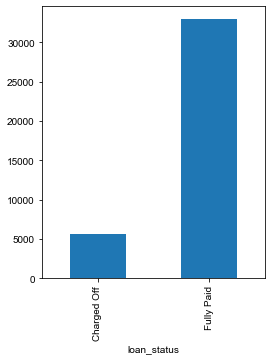

In [23]:
plt.figure(figsize=(4,5))
ax = l.groupby('loan_status').loan_amnt.count().plot.bar()
sns.set_style("ticks")
plt.show()

In [24]:
(l.loc[l['loan_status']=='Charged Off'].loan_status.count())*100/len(l)

14.586411592399616

__We have 14.59% as the limit of Charged Off Ratio beyond that we can say a variable is potential business risk__

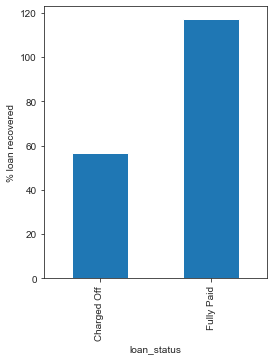

In [25]:
plt.figure(figsize=(4,5))
ax = (l.groupby('loan_status').total_pymnt.sum() * 100 / l.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered')
plt.show()

## Uni-variate and segmented analysis

In [26]:
''' A method to plot both continuous and categorical values''' 
def plotColumn(column, dataset):
    # for continuous values
    if dataset[column].dtype=='int64' or dataset[column].dtype=='float64':
        plt.figure(figsize=(15,5))
        plt.subplot(1, 2, 1)
        # for frequency distribution
        ax = sns.distplot(dataset[column])
        plt.subplot(1, 2, 2)
        # boxplot to check outliers 
        sns.boxplot(x=dataset[column], y=dataset['loan_status'], data=dataset)
        # change scale to log if values in range of 10**5 to get a better view
        if max(dataset[column])>10**5:
            ax.set_xscale('log')
            plt.xscale('log')
        plt.subplots_adjust(wspace=0.4)
        plt.show()

    # for categorical values
    else:       
        # Plot for frequency
        a=pd.DataFrame(dataset.groupby(column).count().counts.reset_index())
        chart0=sns.catplot(x=column, y='counts', data=a, kind='bar', palette="rocket")
        chart0.set_xticklabels(rotation=45, horizontalalignment='center')
        chart0.set_axis_labels(column,'Total Count')
        plt.title('Total Count of '+column , pad=30, fontweight="bold")
        
        # Plot with loan_status
        b=pd.DataFrame(dataset.groupby([column,'loan_status']).sum().counts.reset_index())
        chart1=sns.catplot(x=column, y='counts', hue='loan_status', data=b, kind='point', palette="rocket");
        chart1.set_xticklabels(rotation=45, horizontalalignment='center')
        chart1.set_axis_labels(column,'Count')
        plt.title('Count of '+column +' against loan status', pad=30, fontweight="bold")
        # plt.tight_layout(pad=10.0)
        
        # Plot for Charged Off ratio
        k=pd.DataFrame(dataset.groupby([column,'loan_status']).sum().counts.unstack().reset_index())
        k['ratio']=100*k['Charged Off']/k.sum(axis=1)
        chart2=sns.catplot(x=column, y='ratio', kind='point', data=k)
        chart2.set_xticklabels(rotation=45, horizontalalignment='center')
        chart2.set_axis_labels(column, 'Percentage of Charged Off')
        plt.title('Percentage of Charged Off against '+column, pad=30, fontweight="bold")
        
        #print(plt.xticks()[0])
        if len(plt.xticks()[0])<8:
            chart0.fig.set_size_inches(7,4)
            chart1.fig.set_size_inches(7,4)
            chart2.fig.set_size_inches(7,4)
        else:
            chart0.fig.set_size_inches(12,7)
            chart1.fig.set_size_inches(14,7)
            chart2.fig.set_size_inches(12,7)
         

## Categorical Variables
### 1. grade
Data Dictionary:LC assigned loan grade


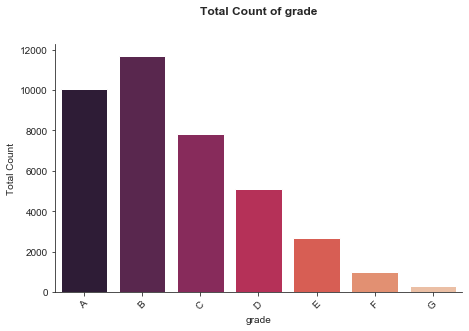

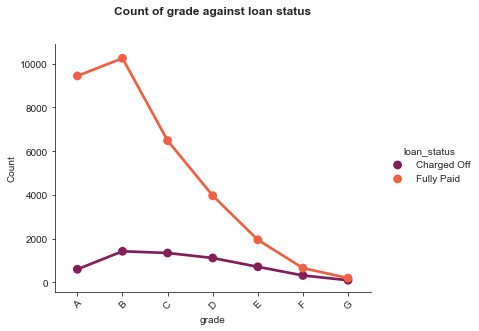

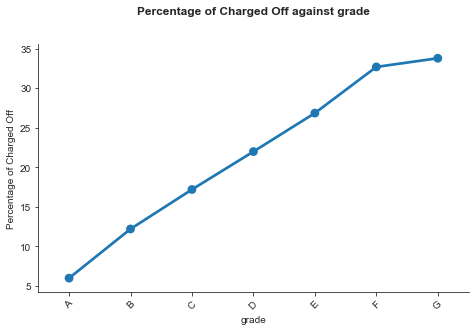

In [27]:
plotColumn('grade',l)

### Observation:
1. We can observe clearly from above graphs that the frequency counts of B is highest and G being the lowest number.
2. In count of grade against loan status too we observe the similar trend.
3. In the third plot 'Percentage of Charged Off against grade', G grade has the highest percentage of Charged Off loans while A being the lowest.
4. We need to explore subgrade for getting clearer picture of grade hence,we can drop grades as subgrade will help dig deeper into the results than grades.

### 2. subgrade
Data Dictionary:LC assigned loan subgrade


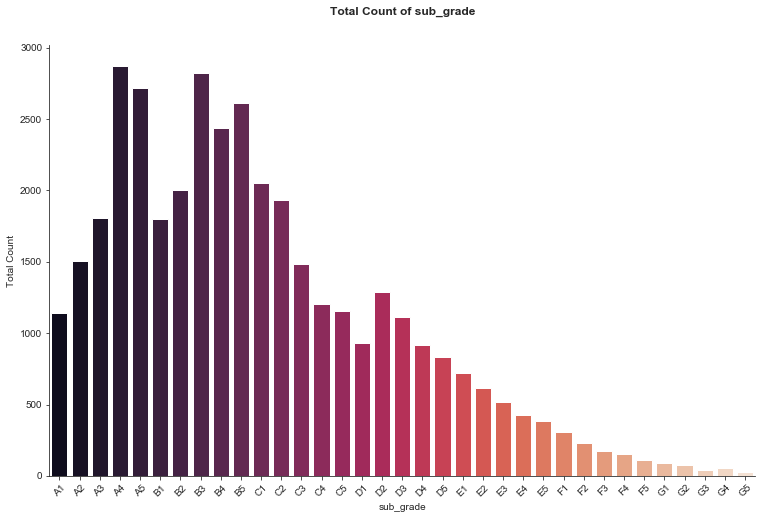

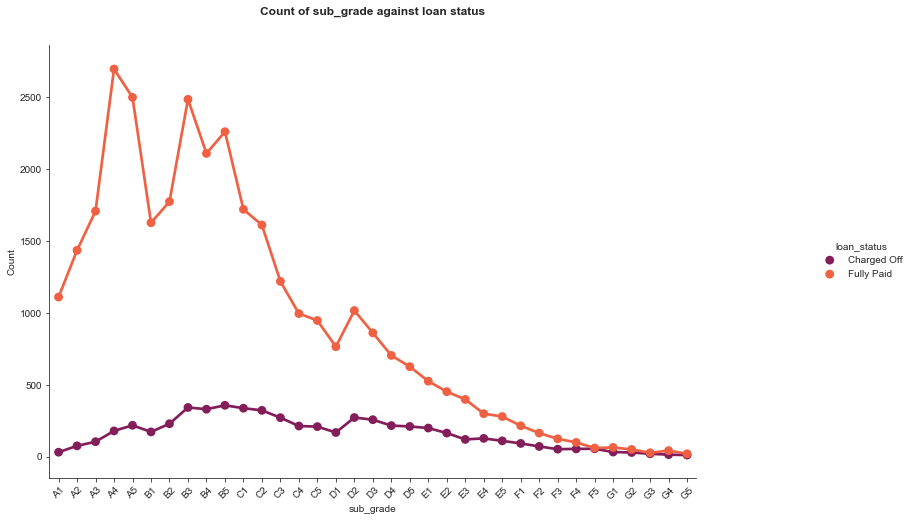

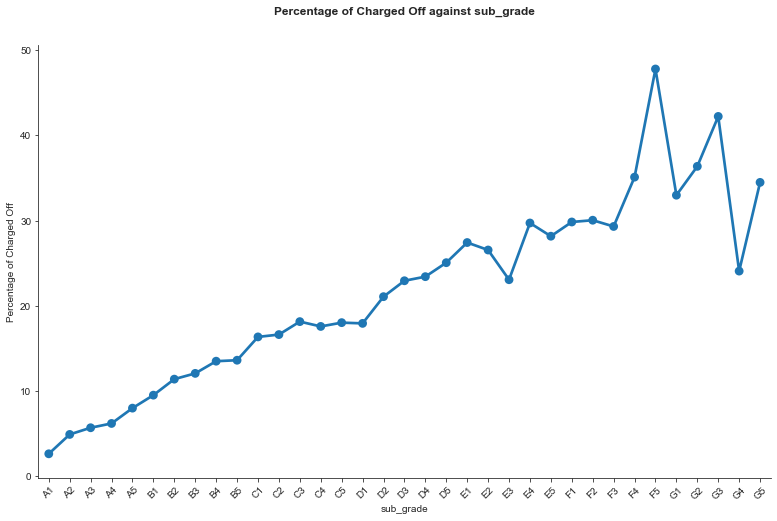

In [28]:
plotColumn('sub_grade',l)

### Observation:
1. The frequency counts of subgrade B3 is highest and G5 being the lowest.
2. In count of subgrade against loan status ,Fully paid has A4 as highest and G5 be the lowest, Charged Off has B5 as highest and G5 as lowest while in Current has B3 as highest and G5 as lowest.
3. In the third plot 'Percentage of Charged Off against subgrade', __F5 grade has the highest percentage of Charged Off loans and G3 is the second highest while A1 being the lowest__.
4. __From B3 to C2 subgrade we have among the highest number of loans given, while their number of charged off loans is quite considerable__.

### 3. purpose
Data Dictionary:A category provided by the borrower for the loan request. 

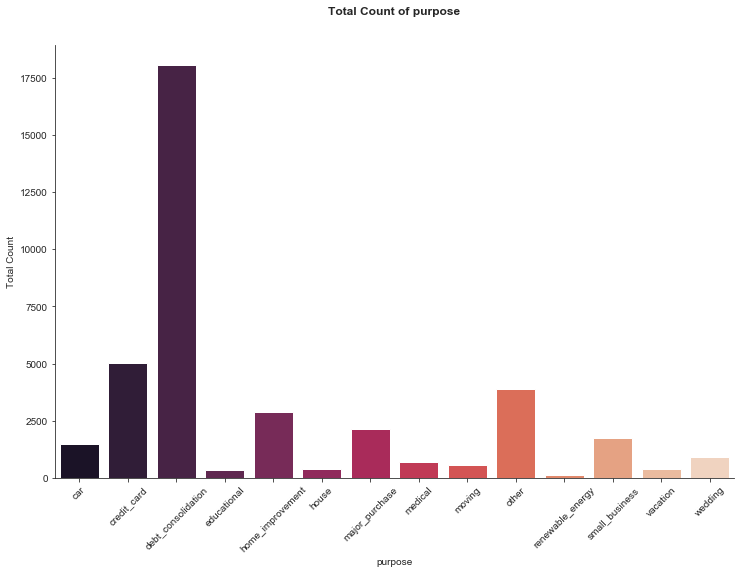

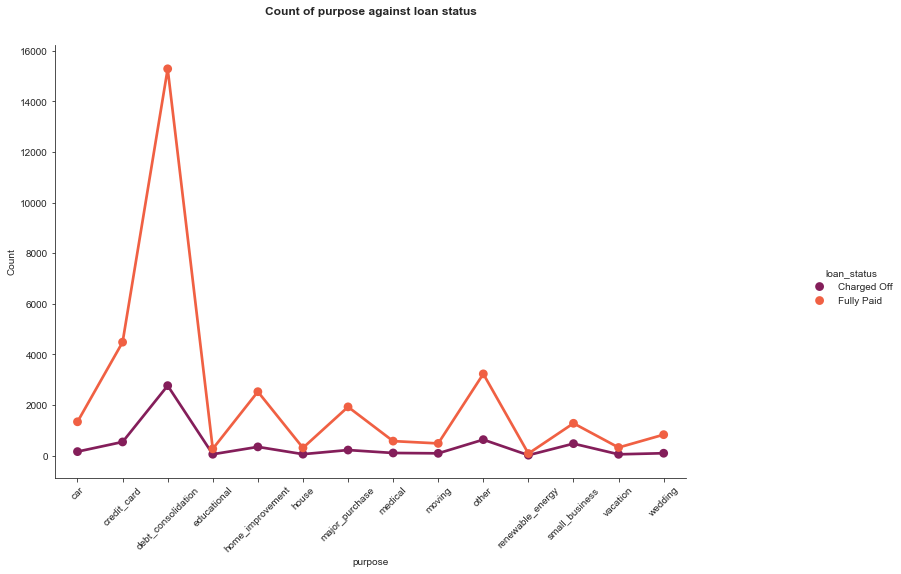

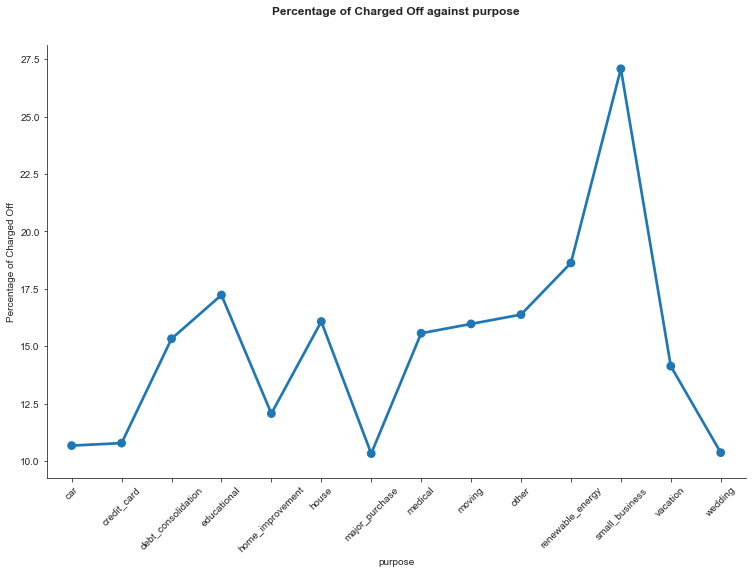

In [29]:
plotColumn('purpose',l)

### Observation:
1. The frequency counts of debt consolidation is highest and renewable energy being the lowest in column purpose.
2. In count of purpose against loan status ,graphs shows the similar trend as debt consolidation being highest and renewable energy as lowest.
3. Actual picture comes in the third plot 'Percentage of Charged Off against purpose', where we can clearly see __small_business having highest Charged Off percent while wedding and major_purpose having lowest percentage of Charged Off loans__.
4. __We have considerable number of charged off among those who have taken loan for debt consolidation__.

### 4. verification_status
Data Dictionary:Indicates if income was verified by LC, not verified, or if the income source was verified

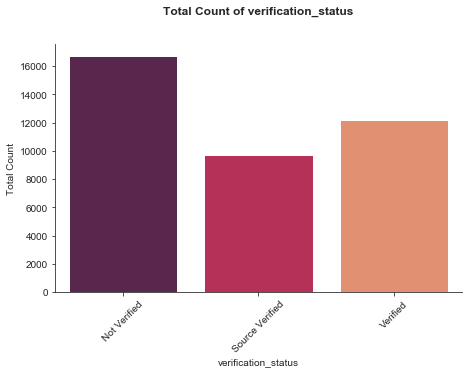

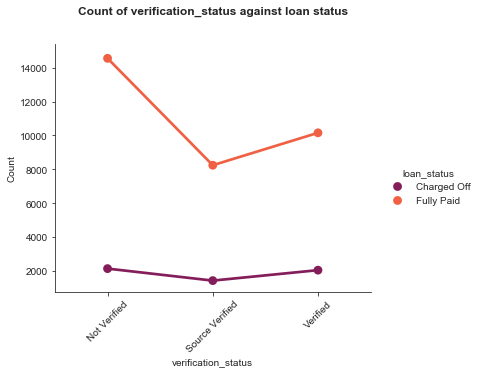

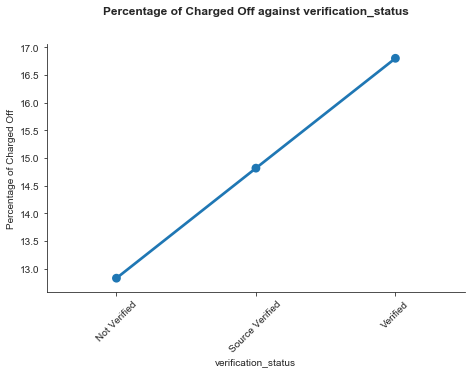

In [30]:
plotColumn('verification_status',l)

### Observation:
1. The frequency counts of Not Verified is highest and Source Verified being the lowest in column verification status.
2. We can see the similar trends in count of purpose against loan status.
3. In the third plot 'Percentage of Charged Off against purpose', we can see Verified verification status having highest Charged Off percentage of Charged Off loans,However,this result is so unexpected.

### 5. emp_length
Data Dictionary:Employment length in years.Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

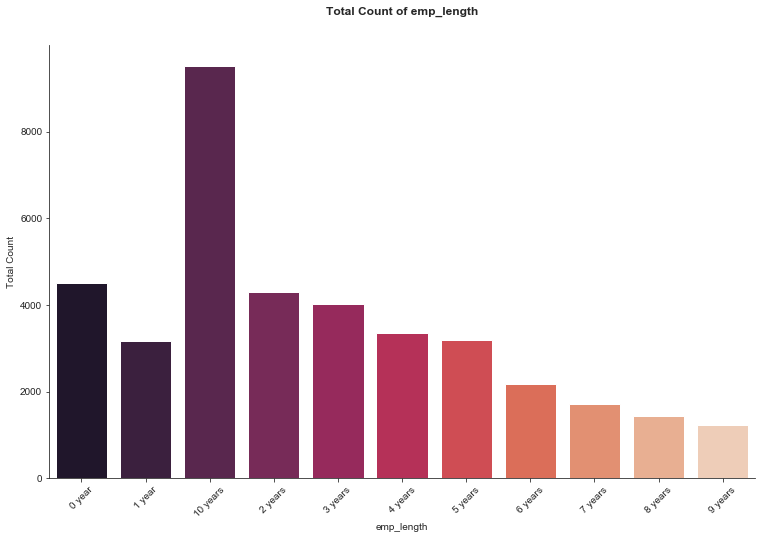

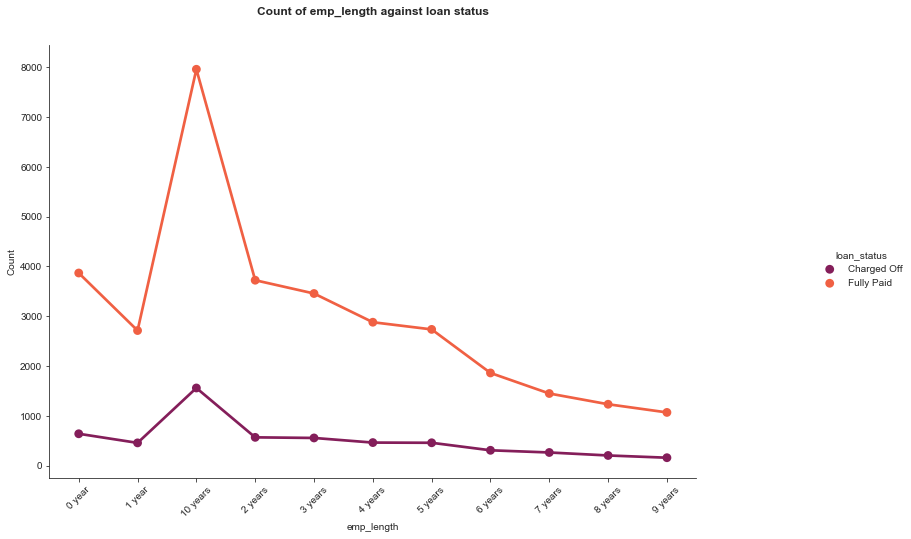

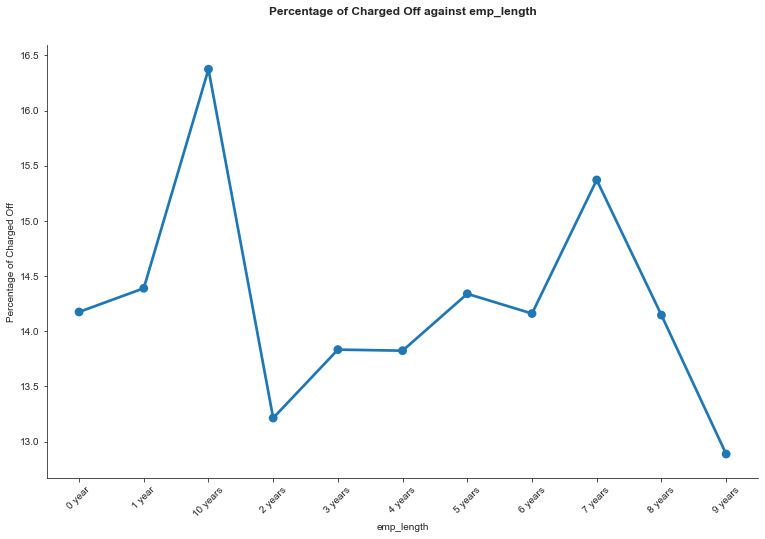

In [31]:
plotColumn('emp_length',l)

### Observation:
1. The frequency counts of 10+year is highest and 9 year being the lowest in column of employment length.
2. We can see the similar trends in count of emp_length against loan status.
3. In the third plot 'Percentage of Charged Off against emp_length', we can see employees having 10+ years having highest Charged Off percentage of Charged Off loans and those who have 9 years of emp_length has lowest percent.

### 6. home_ownership
Data Dictionary:The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

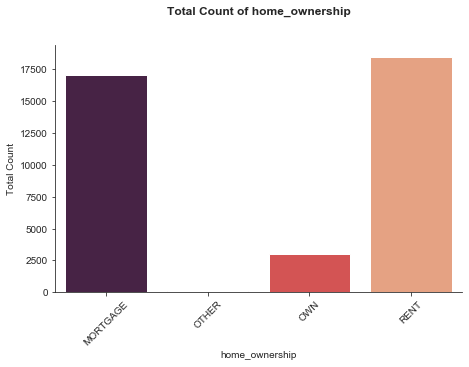

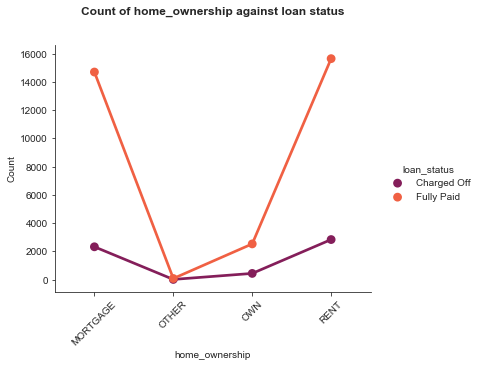

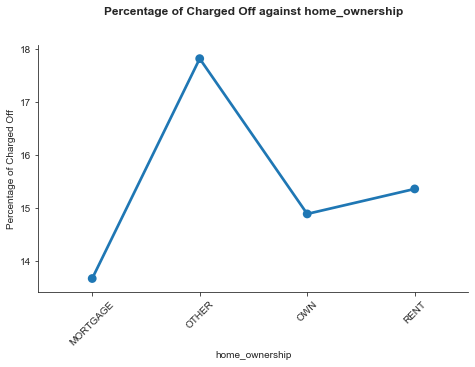

In [32]:
plotColumn('home_ownership',l)

### Observation:
1. The frequency counts of RENT is highest and NONE being the lowest in column of home ownership.
2. RENT type home ownership is highest in all loan status.
3. In the third plot 'Percentage of Charged Off against home ownership', we can see employees who are in OTHER home ownership having highest Charged Off percentage of Charged Off loans, the charged off ratio in RENT is also considerable while those who are having MORTGAGE has lowest percent.

### 7. addr_state
Data Dictionary:The state provided by the borrower in the loan application

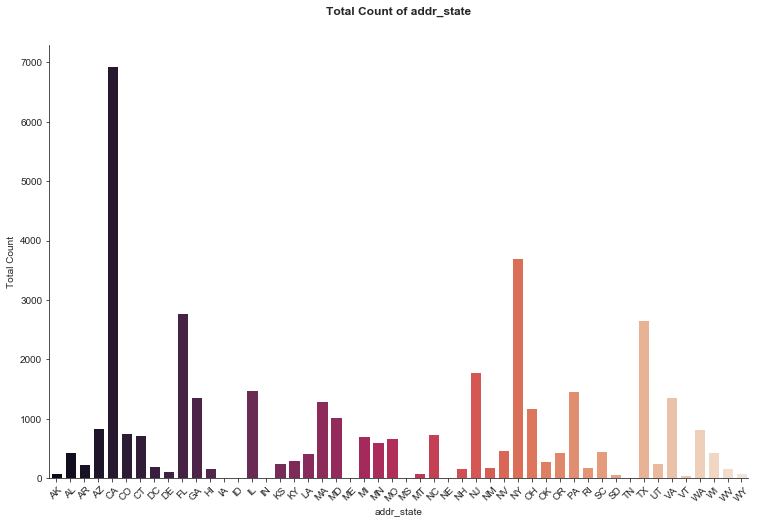

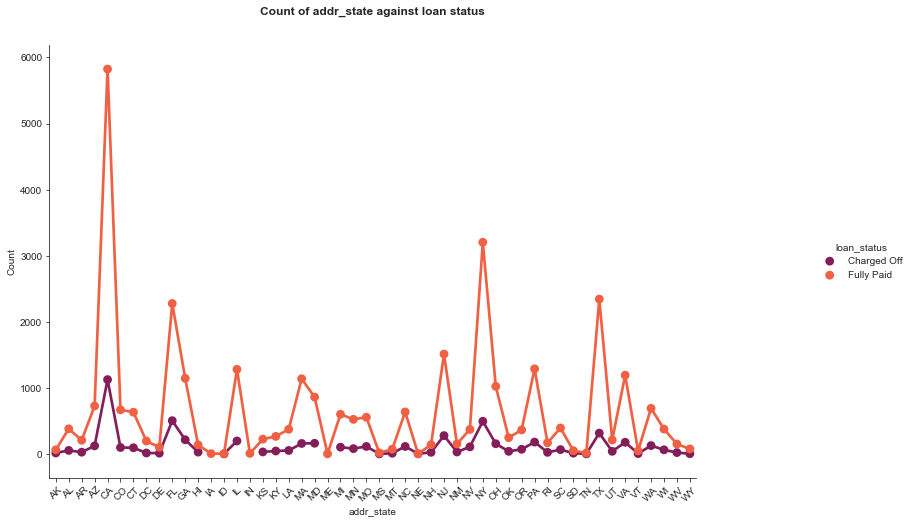

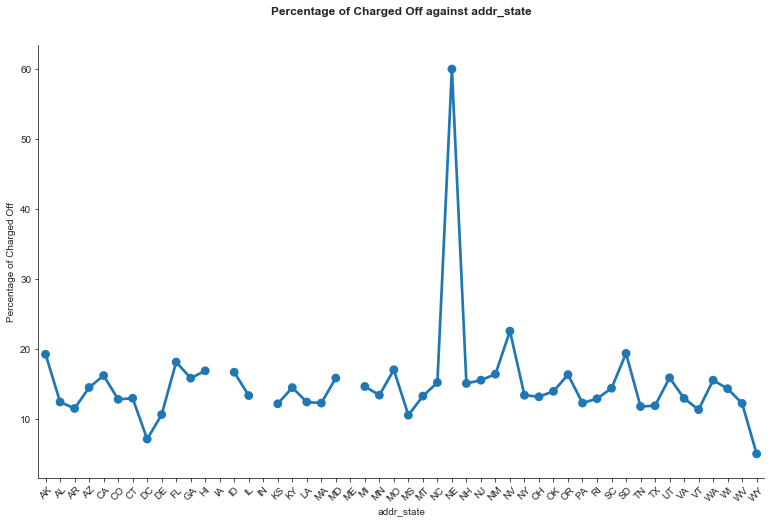

In [33]:
plotColumn('addr_state',l)

### Observation:
1. The frequency counts of CA state is highest in column of addr state.
2. Similary,CA frequency is highest among all loan status.
3. In the third plot 'Percentage of Charged Off against addr_state', we can see employees who are from NE addr state having highest Charged Off percentage of Charged Off loans and those who are from WY has lowest percent.

### 8. pub_rec_bankruptcies
Data Dictionary:Number of public record bankruptcies

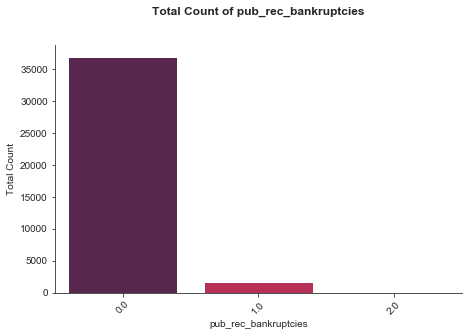

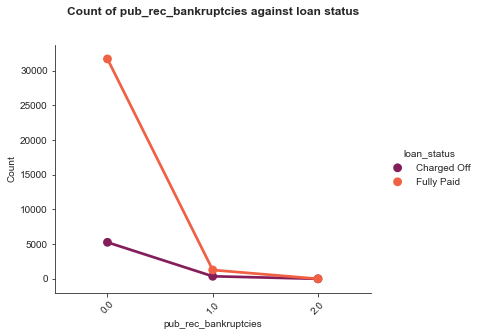

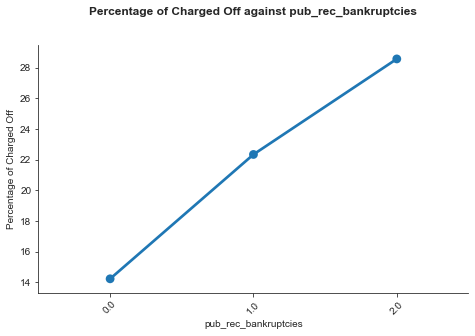

In [34]:
#l['pub_rec_bankruptcies']=l['pub_rec_bankruptcies'].astype('object')
plotColumn('pub_rec_bankruptcies',l)

### Observation:
1. The frequency counts of 0 pub_rec_bankruptcies is highest in column of pub_rec_bankruptcies.
2. Similar trend we could see in second plot, Count of pub_rec_bankruptices against loan status.
3. From the third plot 'Percentage of Charged Off against pub_rec_bankruptices' it is clear that, those employees having 2 pub_rec_bankruptcies has highest Charged Off percentage of Charged Off loans and those who have 0 has lowest percent.Also we cannot ignore 1 pub_rec_bankruptcies as its close to the highest.

### 9. term
Data Dictionary:The number of payments on the loan. Values are in months and can be either 36 or 60.

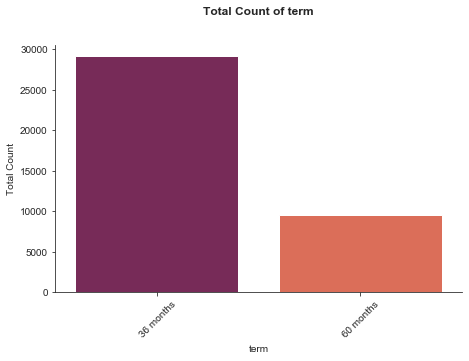

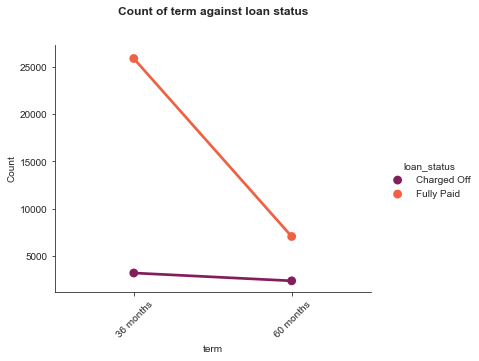

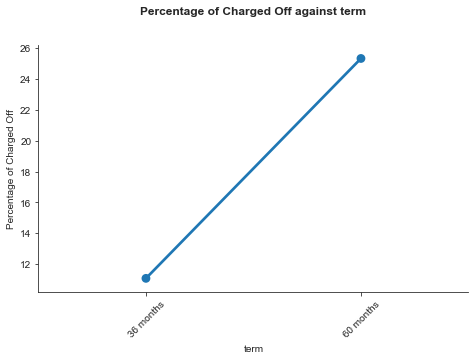

In [35]:
#l['term']=l['term'].astype('object')
plotColumn('term',l)

### Observation:
1. The frequency counts of 36 term is highest in column of term.
2. Similar trend we could see in second plot, Count of term against loan status.
3. From the third plot 'Percentage of Charged Off against term' it is clear that, those who took loan for 60 months term has highest Charged Off percentage of Charged Off loans and those who took for 36 months term has lowest percent.

### 10. pub_rec
Data Dictionary:Number of derogatory public records

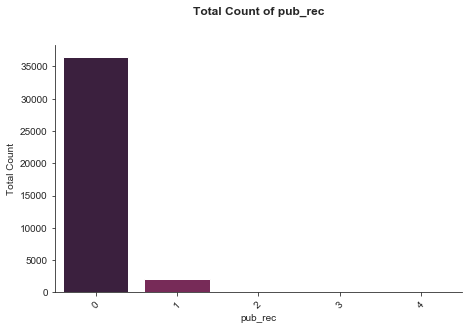

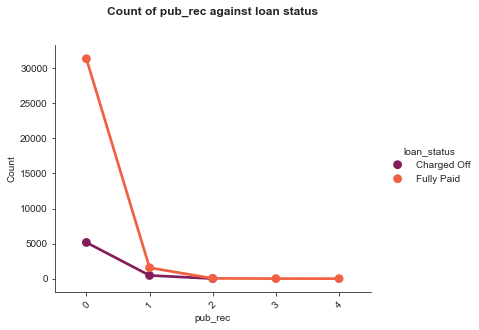

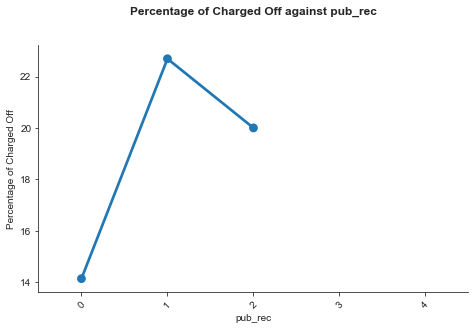

In [36]:
#l['pub_rec']=l['pub_rec'].astype('object')
plotColumn('pub_rec',l)

### Observation:
1. The frequency counts of 0 pub_rec is highest in column of pub_rec.
2. Similar trend we could see in second plot, Count of pub_rec against loan status.
3. In the third plot 'Percentage of Charged Off against pub_rec',we can see that, those who have 1 pub_rec has highest Charged Off percentage of Charged Off loans and those who has 0 pub_rec has lowest percent.Here too, we cannot ignore 2 pub_rec, the percentage is considerable.

### 11. inq_last_6mths
Data Dictionary:The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

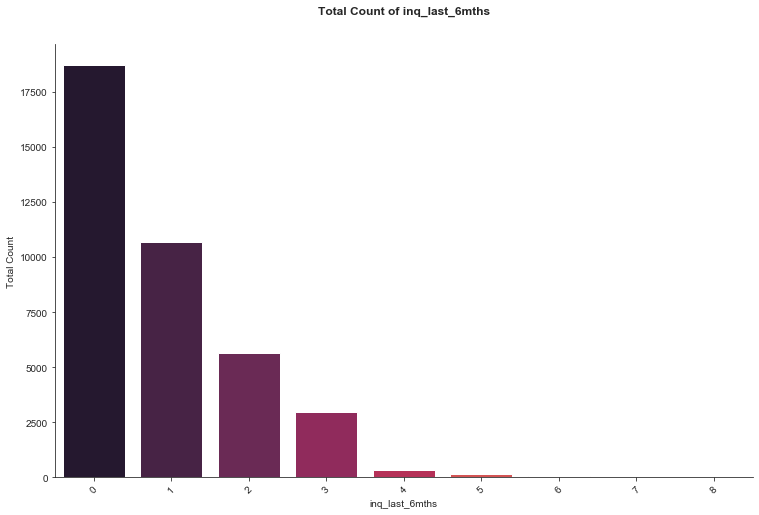

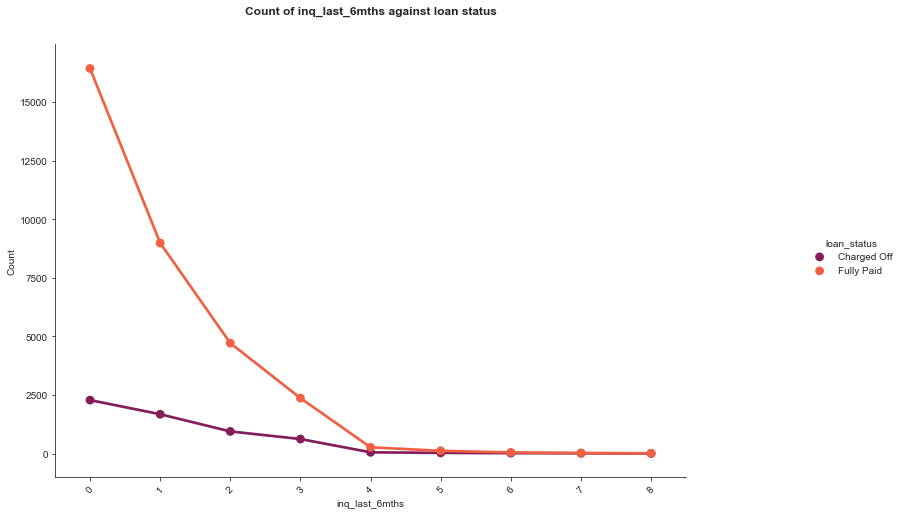

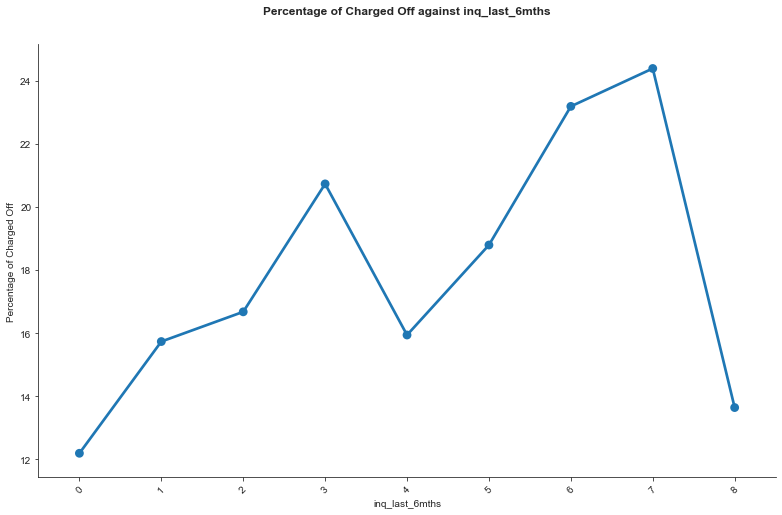

In [37]:
plotColumn('inq_last_6mths',l)

### Observation:
The company is doing good here, giving lesser loans to those who have been enquired more. 

## Continuous Variables
### 1. dti
Data Dictionary:A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


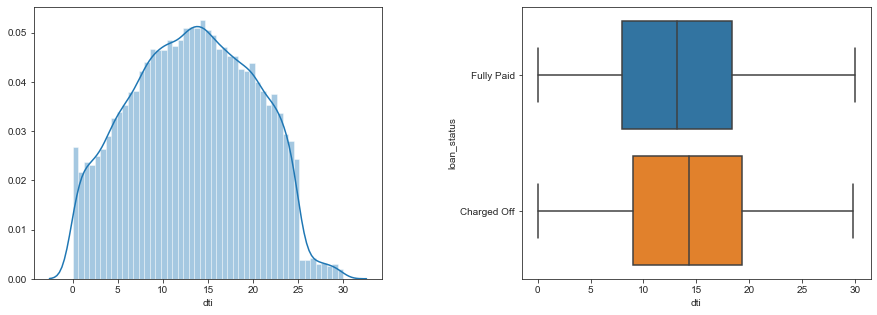

In [38]:
plotColumn('dti',l)

In [39]:
l.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.00,14.00,6.59,0.00,9.05,14.29,19.29,29.85
Fully Paid,32950.00,13.15,6.68,0.00,7.98,13.20,18.39,29.99


In [40]:
l1=l.copy()
l1['dti_bin'] = pd.cut(l['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

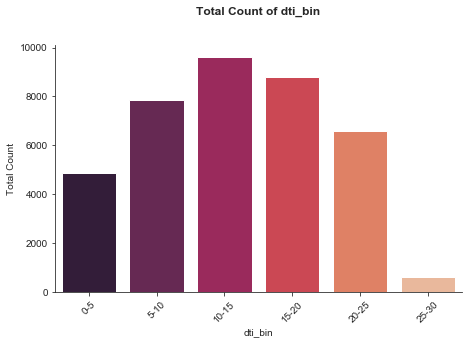

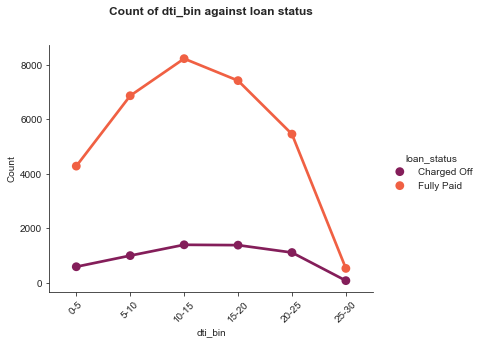

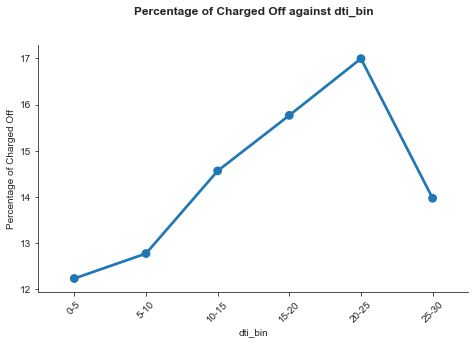

In [41]:
plotColumn('dti_bin',l1)

### Observation:
1. As we can see from the plots and statistics above ,it is observed that the loans which are charged off tend to have higher dti ratio.Here in the graph __dti ratio more than 20 has more chances of getting charged off__.
2. From the above plots LC is giving loans to dti interval 10-15 which is profitable as this is the interval where we find highest count of Fully paid but they are providing loans to __20-25 range of dti which is a matter of loss for them, we also see the highest spike of Charged off ratio in this range__.

### 2. installment
Data Dictionary:The monthly payment owed by the borrower if the loan originates.

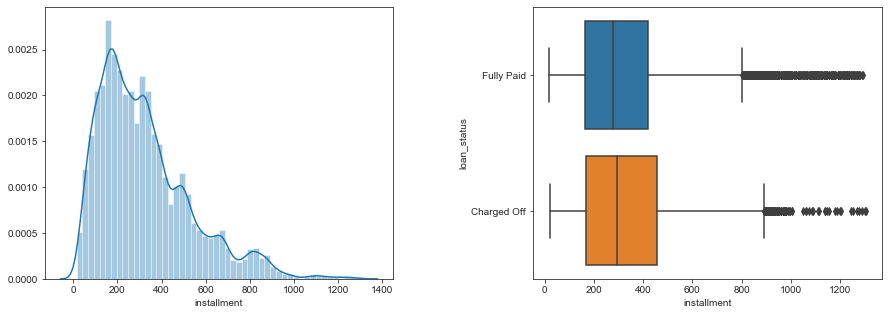

In [42]:
plotColumn('installment',l)

In [43]:
l.groupby('loan_status')['installment'].describe(percentiles=[0.25,0.5,0.75,0.99])

,count,mean,std,min,25%,50%,75%,99%,max
loan_status,,,,,,,,,
Charged Off,5627.00,336.18,217.05,22.79,168.56,293.87,457.84,933.28,1305.19
Fully Paid,32950.00,320.13,207.08,15.69,165.28,275.65,420.74,925.67,1295.21


### Observation:
1. The loans which are getting Charged Off tend to be approx 17 units (in both mean and median) higher than Fully Paid loans.

### 3. int_rate
Data Dictionary:Interest Rate on the loan

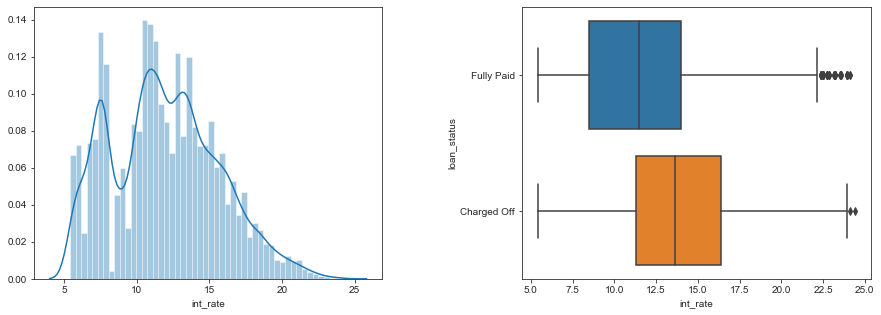

In [44]:
plotColumn('int_rate',l)

In [45]:
l.groupby('loan_status')['int_rate'].describe(percentiles=[0.25,0.5,0.75,0.99])

,count,mean,std,min,25%,50%,75%,99%,max
loan_status,,,,,,,,,
Charged Off,5627.00,13.82,3.65,5.42,11.31,13.61,16.40,22.11,24.40
Fully Paid,32950.00,11.61,3.60,5.42,8.49,11.49,13.99,20.48,24.11


In [46]:
int_rate=l.loc[:]
int_rate['int_rate_bin'] = pd.cut(l['int_rate'], [x for x in range(0, 27, 2)], 
                                      labels=[str(x)+'-'+str(x+2) for x in range (0, 26, 2)])

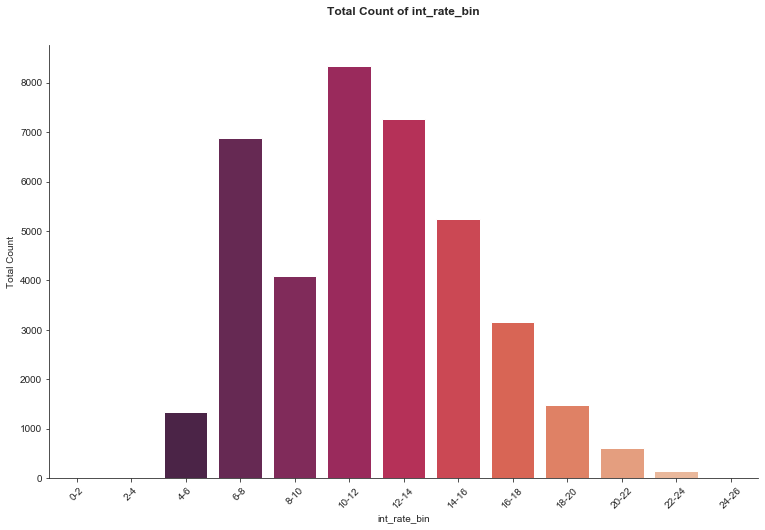

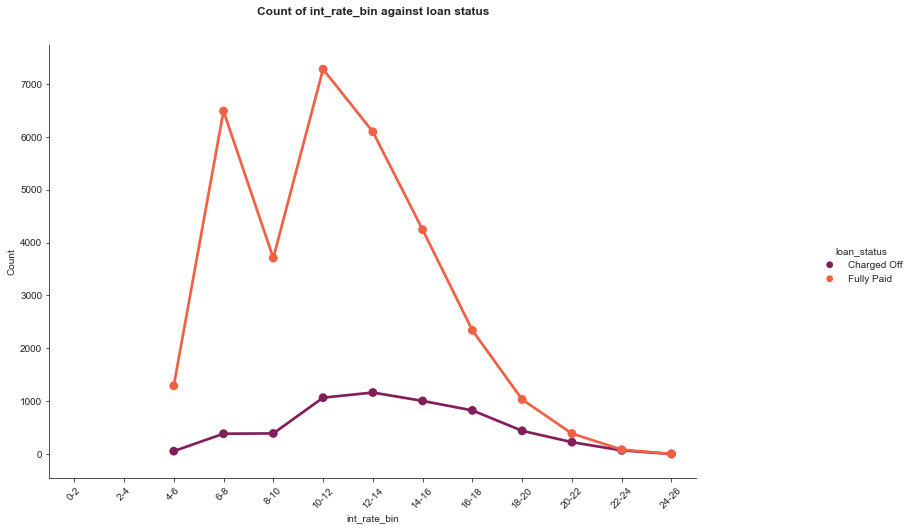

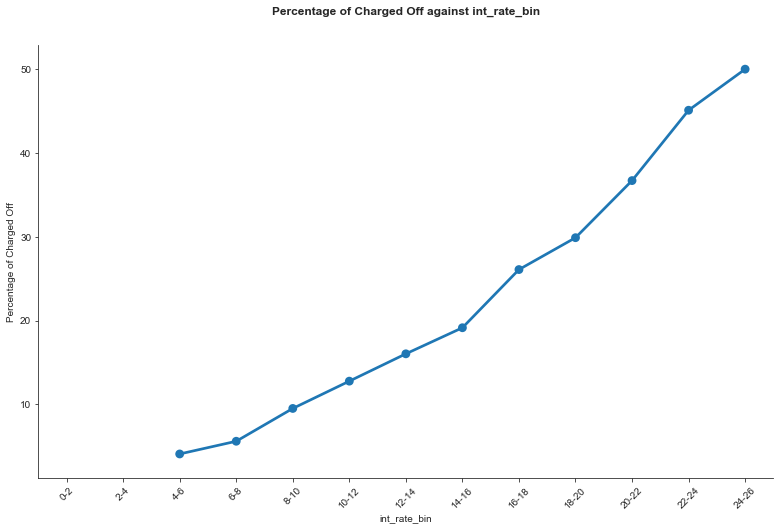

In [47]:
plotColumn('int_rate_bin',int_rate)

### Observation:
1. From above plots and statistics we can clearly conclude that __the loans which are Charged Off tend to have higher interest rate as much as approx 2% more than those which are Fully Paid on average__.It was as expected as the risk increases the interest rate imposed also increases.
2. As we can see the plot above we can infer that __the interval of 6-8 % is the most profitable one, while after 10-12% there is a huge spike in charge off ratio__, Hence, LC is doing well in providing loan interests.

### 4. revol_bal
Data Dictionary:Total credit revolving balance

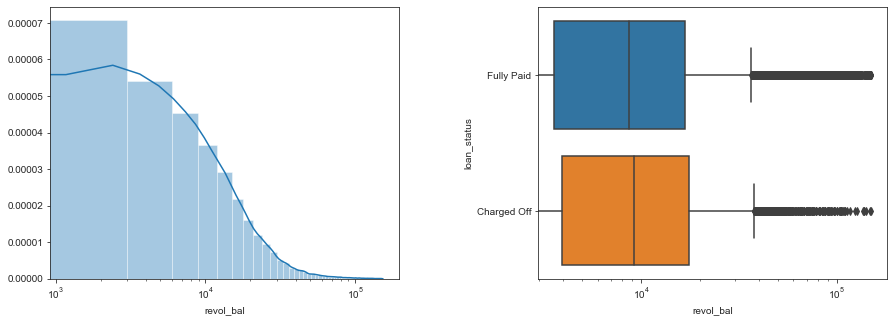

In [48]:
plotColumn('revol_bal',l)

In [49]:
l.groupby('loan_status')['revol_bal'].describe(percentiles=[0.25,0.5,0.75,0.99])

,count,mean,std,min,25%,50%,75%,99%,max
loan_status,,,,,,,,,
Charged Off,5627.00,13514.24,15164.12,0.00,3968.00,9211.00,17518.00,77905.60,148829.00
Fully Paid,32950.00,13251.11,15983.26,0.00,3603.00,8682.50,16804.75,83605.83,149588.00


In [50]:
#Comparing Charged Off and Fully Paid after removing outliers
#Outliers are removed for Charged Off 
g=l[(l['revol_bal']<77905.60) & (l['loan_status']=='Charged Off')]
g.groupby('loan_status')['revol_bal'].describe(percentiles=[0.25,0.5,0.75,0.99])

,count,mean,std,min,25%,50%,75%,99%,max
loan_status,,,,,,,,,
Charged Off,5570.00,12633.92,12343.34,0.00,3943.25,9061.50,17146.50,57695.00,77839.00


In [51]:
#Outliers are removed for Fully Paid
f=l[(l['revol_bal']<83605.83) & (l['loan_status']=='Fully Paid')]
f.groupby('loan_status')['revol_bal'].describe(percentiles=[0.25,0.5,0.75,0.99])

,count,mean,std,min,25%,50%,75%,99%,max
loan_status,,,,,,,,,
Fully Paid,32620.00,12300.11,12827.32,0.00,3554.00,8575.00,16436.50,64250.80,83589.00


### Observation:
1. There isn't much difference between the mean of Charged Off and Fully Paid, cannot come on conclusion by this variable.

### 5. annual_inc
Data Dictionary:The self-reported annual income provided by the borrower during registration.

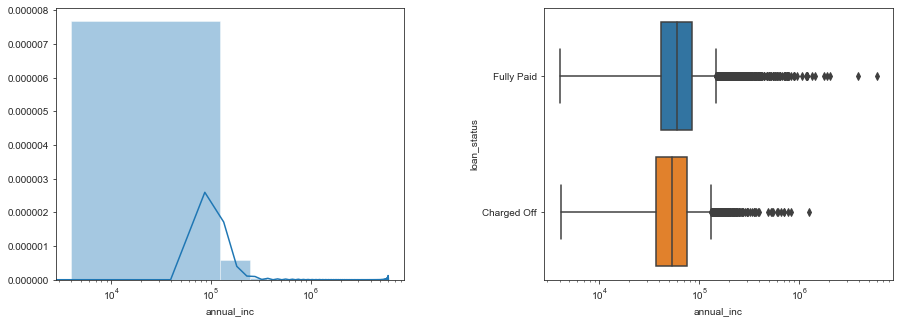

In [52]:
plotColumn('annual_inc',l)

In [53]:
l.groupby('loan_status')['annual_inc'].describe(percentiles=[0.25,0.5,0.75,0.99])

,count,mean,std,min,25%,50%,75%,99%,max
loan_status,,,,,,,,,
Charged Off,5627.00,62427.30,47776.01,4080.00,37000.00,53000.00,75000.00,205960.00,1250000.00
Fully Paid,32950.00,69862.50,66562.25,4000.00,41132.75,60000.00,84000.00,240000.00,6000000.00


count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
99%      234144.00
max     6000000.00
Name: annual_inc, dtype: float64

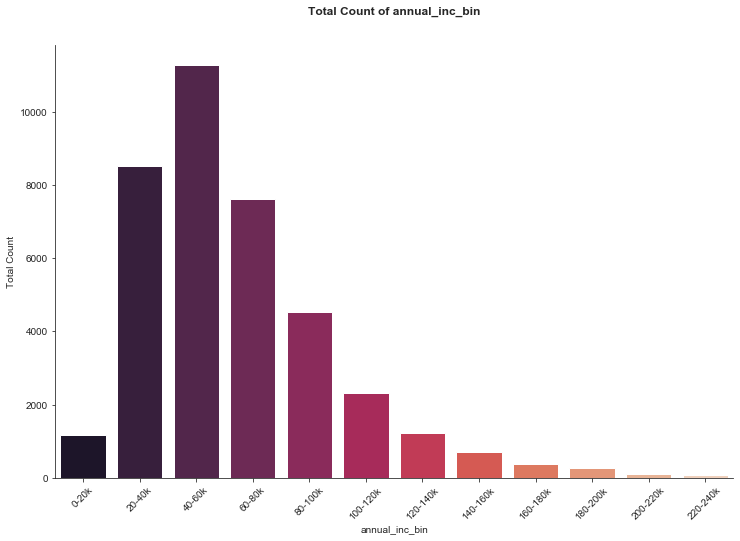

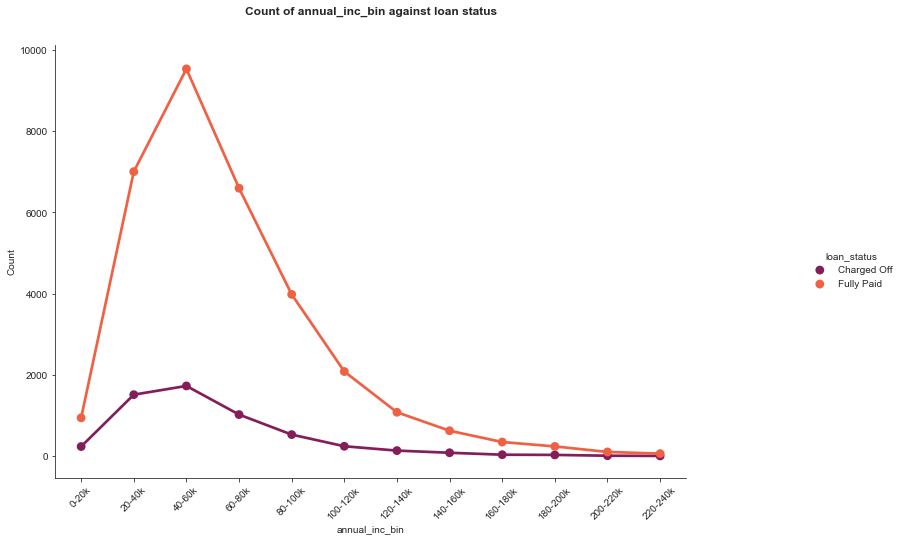

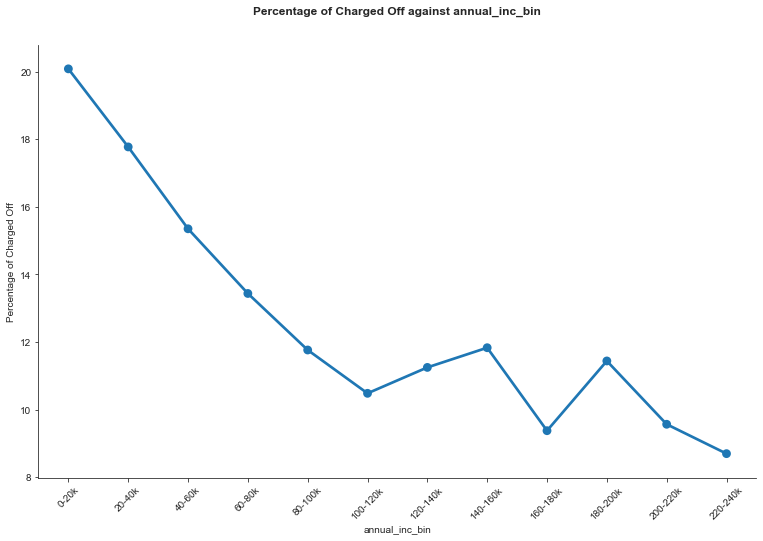

In [54]:
#Type driven Interval variable
'''Below code is for removing outliers from the annual_inc and distributing incomes into intervals'''
display(l.annual_inc.describe(percentiles=[0.25,0.5,0.75,0.99]))
annual_inc=l[(l['annual_inc']<=234144)]
annual_inc['annual_inc_bin'] = pd.cut(annual_inc['annual_inc'], [x for x in range(0, 240001, 20000)], 
                                      labels=[str(x)+'-'+str(x+20)+'k' for x in range (0, 240, 20)])
# annual_inc.head()
plotColumn('annual_inc_bin', annual_inc)

### Observation:
1. The above statistics and graphs infer that the loan records which are being charged Off have lower annual income range,__those who are earning 0-20k annualy has highest charged off ratio__.
2. We further observed that the highest charge off ratios occur in the annual income range 0-60k, we will dig up the reasons why it is happening for this particular range.

### 6. revol_util
Data Dictionary:Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

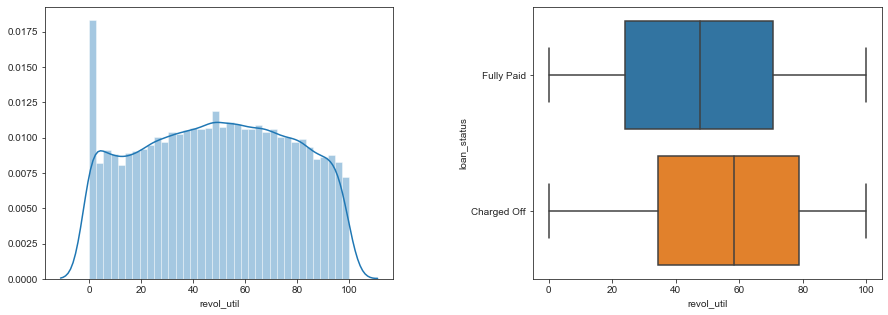

In [55]:
plotColumn('revol_util',l)

In [56]:
l.groupby('loan_status')['revol_util'].describe(percentiles=[0.25,0.5,0.75,0.99])

,count,mean,std,min,25%,50%,75%,99%,max
loan_status,,,,,,,,,
Charged Off,5627.00,55.55,27.87,0.00,34.40,58.20,78.95,99.00,99.90
Fully Paid,32950.00,47.53,28.26,0.00,23.90,47.60,70.80,98.30,99.90


In [57]:
l1=l.copy()
l1['revol_util_bin'] = pd.cut(l['revol_util'], [0,10,20,30,40,50,60,70,80,90,100], labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])

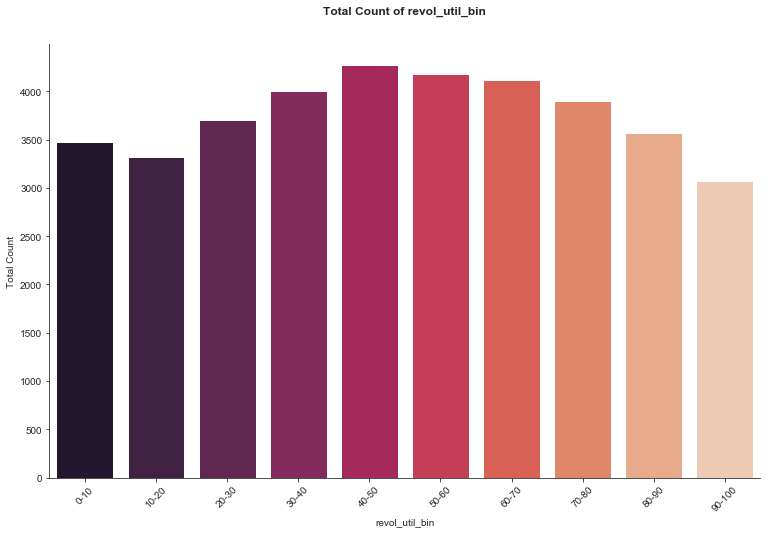

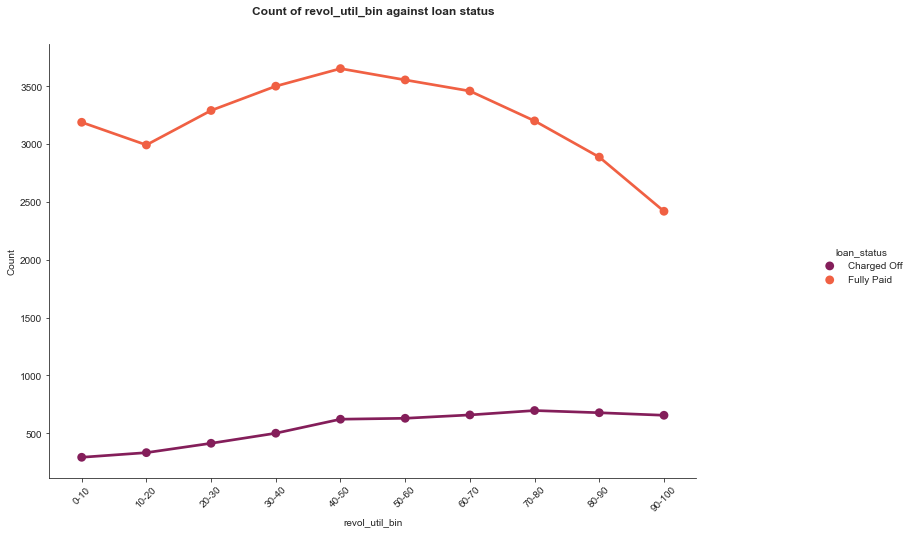

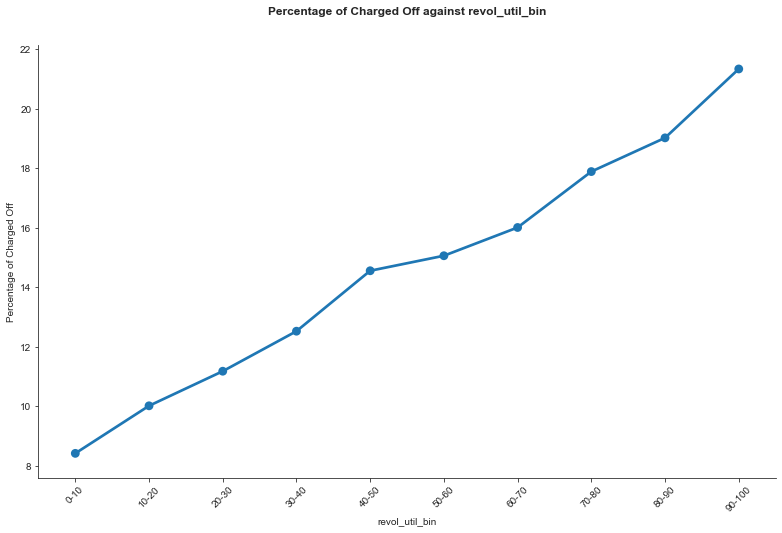

In [58]:
plotColumn('revol_util_bin',l1)

### Observation:
As from the charged off ratio plot seen above those who have revol util rate in the range of 90-100 has highest charge off ratio.

### 7. loan_amnt
Data Dictionary:The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

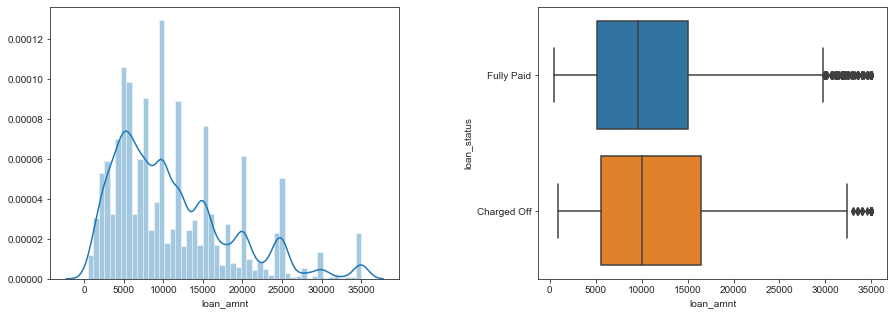

In [59]:
plotColumn('loan_amnt',l)

In [60]:
l.groupby('loan_status')['loan_amnt'].describe(percentiles=[0.25,0.5,0.75,0.99])

,count,mean,std,min,25%,50%,75%,99%,max
loan_status,,,,,,,,,
Charged Off,5627.00,12104.39,8085.73,900.00,5600.00,10000.00,16500.00,35000.00,35000.00
Fully Paid,32950.00,10866.46,7199.63,500.00,5200.00,9600.00,15000.00,35000.00,35000.00


In [61]:
# the distribution above is mostly rightly skewed so bins can be created clearer picture
#Type driven interval variable
l1=l.copy()
l1['loan_amnt_bin'] = pd.cut(l['loan_amnt'], [x for x in range(0, 36001, 2000)], 
                                      labels=[str(x)+'-'+str(x+2)+'k' for x in range (0, 36, 2)])

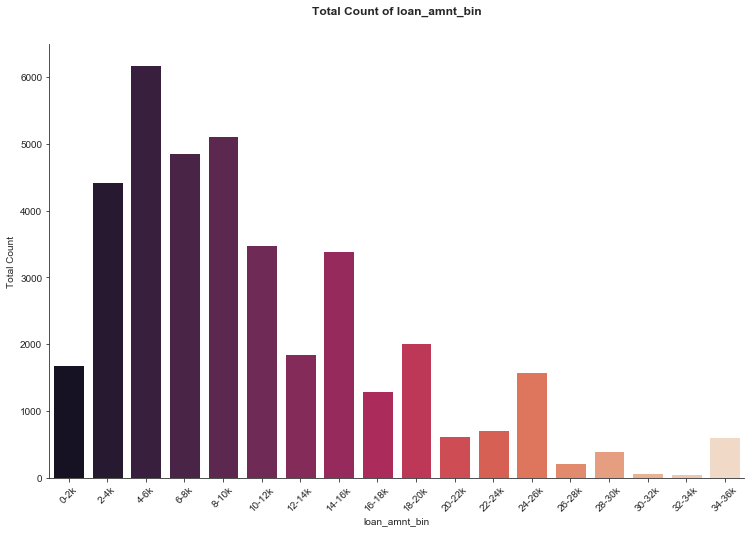

In [ ]:
plotColumn('loan_amnt_bin',l1)

### Observation:
We can see from the above plots that the loan amount request greater than 20k have consistently higher Charged off ratio. Higher the loan amount request ,higher will be the chance of getting charged off.

### 8. total_pymnt
Data Dictionary:Payments received to date for total amount funded

In [ ]:
plotColumn('total_pymnt',l)

In [ ]:
l.groupby('loan_status')['total_pymnt'].describe(percentiles=[0.25,0.5,0.75,0.99])

In [ ]:
'''Below code is for removing outliers from the total_paymnt'''
#display(l.total_pymnt.describe(percentiles=[0.25,0.5,0.75,0.99]))
total_pymnt=l[(l['total_pymnt']<=42059)]
total_pymnt.groupby('loan_status')['total_pymnt'].describe(percentiles=[0.25,0.5,0.75,0.99])

### Observation:
The average amount paid in Charged Off is much lesser than in Fully Paid.

### 9. total_acc and open_acc
Data Dictionary:<br>Total_acc -The total number of credit lines currently in the borrower's credit file<br>Open_acc - No of open credit lines


In [ ]:
plotColumn('total_acc',l)

In [ ]:
plotColumn('open_acc',l)

In [ ]:
display(l.groupby('loan_status')['total_acc',].describe(percentiles=[0.25,0.5,0.75,0.99]))
display(l.groupby('loan_status')['open_acc',].describe(percentiles=[0.25,0.5,0.75,0.99]))

### Observation:
There is no significant difference between Charged Off and Fully Paid under the columns total_acc and open_acc.

### 10. last_pymnt_amnt
Data Dictionary:Last total payment amount received

In [ ]:
plotColumn('last_pymnt_amnt',l)

In [ ]:
display(l.groupby('loan_status')['last_pymnt_amnt'].describe(percentiles=[0.25,0.5,0.75,0.99]))

In [ ]:
'''Below code is for removing outliers from the last_paymnt_amnt'''
last_pymnt_amnt=l[(l['last_pymnt_amnt']<=22125)]
last_pymnt_amnt.groupby('loan_status')['last_pymnt_amnt'].describe(percentiles=[0.25,0.5,0.75,0.99])

### Observation:
1. The results came are expected as we can see that the average of Charged Off is significantly lower than that of Fully Paid.

### Ignore variables:
1. recoveries, collection_recovery_fee:- these variables are specifically for Charged Off, so we can remove these variables.
2. total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee:-The reason for dropping these variables is either their insignificance for analysis or they may not be available at the time of funding.
3. funded_amnt, funded_amnt_inv:- These column are approximately similar to loan_amnt. So, we can drop them.

In [ ]:
ignore="recoveries,collection_recovery_fee,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,funded_amnt,funded_amnt_inv"
cols=list(set(l.columns)-set(ignore.split(",")))
l=l.loc[:,cols]
print(len(l.columns))
l.head()

## Analysis of Type and Data Driven variables
### 1. customer_first_loan_year- Extracted year from earliest credit line.

In [ ]:
plotColumn('customer_first_loan_year',l)

### Observation:
1. We could see that LC has given very high number of loans whose earliest credit line is less. So, the company should give loans to those whose earliest credit line is more to gain more profit.

### 2. loan_issue_month:- month extracted from issue_d


In [ ]:
plotColumn('loan_issue_month',l)

### Observation:
1. We observed that the last quarter tends to have higher charged off ratio.

### 3. loan_amount vs annual_income_ratio:

In [ ]:
plotColumn('loan_by_annual_inc_ratio',l)

In [ ]:
l1=l.copy()
l1['loan_by_annual_inc_ratio'] = pd.cut(l['loan_by_annual_inc_ratio'], [round(x/10,2) for x in range(0,11)], labels=[str(round(x/10,2))+'-'+str(round(x/10+0.1,2)) for x in range(0,10)])
plotColumn('loan_by_annual_inc_ratio', l1)

### Observation:
1. We have observed that Charged Off ratio increases after 0.3

## Bi-Variate Analysis

### Correlation using Heat map
*Check the dependency of one variable on other* 

In [ ]:
# Converting loan_status to 0,1 categories to get the correlation on it
l1=l.copy()
l1['defaulter']=pd.factorize(l.loan_status)[0]
plt.figure(figsize=(17,13))
plt.title('Heat map for correlation', pad=20)
ax=sns.heatmap(l1.drop(columns={'counts'}).corr(), linewidths=.5, center=0, annot=True, fmt='.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Observation:
1. installment and total_pymnt has a good correlation of 0.86.
2. revol_util and int_rate has a correlation of 0.47, which is good as business risk increases int rate also increases.

### 1. loan_amnt vs annual_inc

In [ ]:
l_wo=l.loc[l['annual_inc']<=240000.00]
g=sns.jointplot(x='loan_amnt',y='annual_inc',height=7,ratio=7,data=l_wo)
g.fig.suptitle('Annual Income vs Loan Amount', size='x-large', weight='bold')
g.fig.subplots_adjust(top=0.91)
plt.show()

### Observation:
__In the plot above we can see that those who are earning less are given loan worth of high amount, giving the company more business risk.__

### 2. int_rate vs sub_grade

In [ ]:
g=l.loc[:,['sub_grade','int_rate']].sort_values('sub_grade')
g=sns.catplot(x='sub_grade', y='int_rate',aspect=2,data=g)
g.fig.suptitle('Interest Rate vs Sub-Grade', size='x-large', weight='bold')
g.fig.subplots_adjust(top=0.91)
plt.show()

### Observation:
1. We can clearly see that as the sub_grade worsens , the int_rate increases in the same order.

### 3. loan_amnt vs int_rate

In [ ]:
g=sns.jointplot(x='loan_amnt',y='int_rate',height=7,ratio=7,data=l[l.loan_status=='Charged Off'])
g.fig.suptitle('Interest Rate vs Loan Amount', size='x-large', weight='bold')
g.fig.subplots_adjust(top=0.91)
plt.show()

### Observation:
1. Above scatter plot gives us an idea that the density of defaulters is more in the range where interest rate is high and loan amount is small.

### 4. revol_util vs int_rate

In [ ]:
g=sns.jointplot(x='revol_util',y='int_rate',height=7,ratio=7,data=l)
g.fig.suptitle('Interest Rate vs Revol Util', size='x-large', weight='bold')
g.fig.subplots_adjust(top=0.91)
plt.show()

### Observation:
1. Plot shows relation between revol_util and int_rate columns , as revol_util increases LC starts charging more interest which is a good sign.

### 5. delinq_2yrs vs int_rate vs loan_status

In [ ]:
g=sns.catplot(x='delinq_2yrs', y='int_rate', hue='loan_status', kind='bar', data=l, height=6, aspect=1.5)
g.fig.suptitle('Interest Rate vs Delinq_2_years vs Loan status', size='x-large', weight='bold')
g.fig.subplots_adjust(top=0.91)
plt.show()

### Observation:
1. We observed that interest rate increases with increase in delinquency(in last 2 years)

### 6. loan_amnt vs verification_status vs loan status

In [ ]:
g=sns.catplot(x='verification_status', y='loan_amnt', hue="loan_status",kind='bar', data=l, height=6, aspect=1.5)
g.fig.suptitle('Loan Amount vs Verification Status vs Loan status', size='x-large', weight='bold')
g.fig.subplots_adjust(top=0.91)
plt.show()

### Observation:
1. Higher Amount of Loans are under verified category which are getting charged off.